In [12]:
import numpy as np
import pandas as pd

#Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)
sns.set()
sns.set(font_scale=1.5)

#Packages for performing LR
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm

#Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#the command below tells pandas to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns',100)
pd.set_option('expand_frame_repr', True)


In [13]:
path = 'data/'
filename = 'loans.csv'
df = pd.read_csv(path+filename)

In [14]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [15]:
df.columns.tolist()

['id_number',
 'loan_amount',
 'lender_count',
 'status',
 'funded_date',
 'funded_amount',
 'repayment_term',
 'location_country_code',
 'sector',
 'description',
 'use']

In [16]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'loan_amount'
y = df[y_column]
# Define our independent variables
x_columns = ['lender_count']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed to include the constant term from the linear regression eqn.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# using statsmodel implementation

model = sm.OLS(endog=y_train, exog=X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:49:08   Log-Likelihood:                -40440.
No. Observations:                4815   AIC:                         8.088e+04
Df Residuals:                    4813   BIC:                         8.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lender_count    31.2180      0.218    143.497   

In [18]:
model_fit.params.intercept

385.4126864183964

In [19]:
model_fit.params.lender_count

31.217979063228615

In [20]:
y_pred_test = model_fit.predict(X_test)

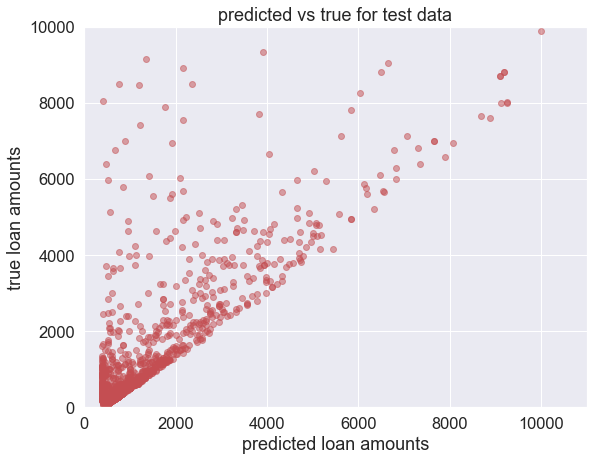

In [21]:
plt.figure(figsize=(9,7))
plt.scatter(y_pred_test, y_test, alpha=0.5, c='r')
plt.title('predicted vs true for test data')
plt.xlabel('predicted loan amounts')
plt.ylabel('true loan amounts')
axes = plt.gca()
axes.set_xlim([0,11000])
axes.set_ylim([0,10000])
plt.show();